In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
def checker(array):
    """Checks if the sudoku is correctly filled"""
    #Checks rows and columns
    for i in range(9):
        if np.sum(array[i]) != 45 or np.sum(array[:,i]) != 45:
            return False
    #Checks boxes
    for i in [[0,3],[3,6],[6,9]]:
        for j in [[0,3],[3,6],[6,9]]:
            if np.sum(array[i[0]:i[1],j[0]:j[1]]) != 45:
                return False
    return True

def chooser(s_index,r_index,c_index):
    temp = list(set.intersection(set(sq[s_index]),set(row[r_index]),set(col[c_index])))
    if not temp:
        return 10
    else:
        num = np.random.choice(np.asarray(temp),size=None)
        sq[s_index].remove(num)
        row[r_index].remove(num)
        col[c_index].remove(num)
        return num

In [3]:
def puzzle_maker():
    
    global sq
    global row
    global col
    
    sq = [] # Each sudoku square
    row = [] # Each sudoku row
    col = [] # Each sudoku column
    puzzle = np.zeros([9,9],dtype=int) # Initialise 9x9 grid

    # Create list of numbers to pick from
    for i in range(9):
        sq.append([1,2,3,4,5,6,7,8,9]) 
        row.append([1,2,3,4,5,6,7,8,9])
        col.append([1,2,3,4,5,6,7,8,9])
        
    # Loop over each element in 'puzzle'
    check = False

    while not check:
        for i in range(9):
            for j in range(9):
                if i < 3 and j < 3:
                    puzzle[i,j] = chooser(0,i,j)

                elif i < 3 and j > 2 and j < 6 :
                    puzzle[i,j] = chooser(1,i,j)

                elif i < 3 and j > 5 :
                    puzzle[i,j] = chooser(2,i,j)

                elif i > 2 and i < 6 and j < 3:
                    puzzle[i,j] = chooser(3,i,j)

                elif i > 2 and i < 6 and j > 2 and j < 6 :
                    puzzle[i,j] = chooser(4,i,j)

                elif i > 2 and i < 6 and j > 5 :
                    puzzle[i,j] = chooser(5,i,j)

                elif i > 5 and j < 3:
                    puzzle[i,j] = chooser(6,i,j)

                elif i > 5 and j > 2 and j < 6 :
                    puzzle[i,j] = chooser(7,i,j)

                elif i > 5 and j > 5 :
                    puzzle[i,j] = chooser(8,i,j)

        check = checker(puzzle)
        sq = [] # Each sudoku square
        row = [] # Each sudoku row
        col = [] # Each sudoku column
        for i in range(9):
            sq.append([1,2,3,4,5,6,7,8,9]) 
            row.append([1,2,3,4,5,6,7,8,9])
            col.append([1,2,3,4,5,6,7,8,9])
    return puzzle

In [5]:
def position_num(grid):
    """Returns the the positions of all empty grid spaces and their respective possible numbers"""
    x_pos = []
    y_pos = []
    #valid_n = 9
    valid_nums = []
    for i in range(9):
        for j in range(9):
            #temp_n = 0
            temp_nums = []
            if grid[i,j] == 0:
                for k in range(1,10):
                    if valid(grid,j,i,k): # Check if the number fits
                        #temp_n += 1
                        temp_nums.append(k)
                #if temp_n < valid_n:
                #valid_n = temp_n
                valid_nums.append(temp_nums)
                x_pos.append(j)
                y_pos.append(i)
    return y_pos,x_pos,valid_nums

def valid(grid,x,y,n):
    """Determines if the number, n, fits in coordinate (x,y) on grid"""
    # Check row
    for i in range(9):
        if grid[y,i] == n:
            return False
    # Check column
    for i in range(9):
        if grid[i,x] == n:
            return False
    # Check square
    box_x = x//3
    box_y = y//3
    
    for i in range(box_y*3, box_y*3 + 3):
        for j in range(box_x*3, box_x*3 + 3):
            if grid[i,j] == n:
                return False
    return True

def empty(grid):
    """Finds empty parts in grid, returns false if full and true if empty spot"""
    for i in range(9):
        for j in range(9):
            if grid[i,j] == 0:
                return True
    return False

In [6]:
def solver(array):
    """Finds every solution to a sudoku via the backtracking algorithm, and returns True if only one solution exists"""
    grid = np.copy(array)
    #prev_sol = np.zeros([9,9],dtype=int)
    y_pos,x_pos,nums = position_num(grid) #Positions with possible entries
    # Sort the lists so fewest possibilities go first
    zipped = sorted(zip(nums,y_pos,x_pos),key=lambda x: len(x[0]))
    nums,y_pos,x_pos = [list(a) for a in zip(*zipped)]
    if len(nums) == 1:
        return True
    nums_clone = copy.deepcopy(nums) # Make a copy of the numbers to be re-added when all possibilities exhausted
    count = 0 # Number of Solutions
    n_index = 0 # Index of possible numbers 
    i = 0
    while i < len(nums) and i > -1: # Loop over every position
        if len(nums[i]) < 1: # When there are no more numbers left to try
            grid[y_pos[i],x_pos[i]] = 0 #Grid element goes back to being empty
            nums[i] = copy.deepcopy(nums_clone[i]) # possible numbers are replaced
            i -= 1 #We go back to previous position
            continue # Don't bother checking the grid
        
        else:
            if not valid(grid,x_pos[i],y_pos[i],nums[i][0]): #If number doesn't fit
                nums[i].pop(0) # Remove it from the possibilities
            else:
                grid[y_pos[i],x_pos[i]] = nums[i][0] # Place number onto grid
                nums[i].pop(0) # Remove it from the possibilities
                i += 1 # Move onto the next set
        # Once we inserted the last number        
        if i == len(nums): 
            # If the grid is solved
            if checker(grid): #and not (grid == prev_sol).all(): 
                count += 1
                i -= 1 # Move back to normal position
                #prev_sol = np.copy(grid)
                for j in range(len(y_pos)-1,-1,-1): #Count backwards to look for more possible solutions
                    if len(nums[j]) != 0: #If there is still a number to try...
                        break # go out of this loop and try the number
                    #Otherwise put the numbers back and bring i back to the start to continue the search
                    nums[j] = copy.deepcopy(nums_clone[j]) 
                    i -= 1
                
    if count != 1:
        return False
    
    return True      
            

In [7]:
# Remove mirror pairs

def remove(grid):
    post_grid = np.copy(grid)
    pairs = []
    for i in range(9):
        for j in range(9):
            #if i+j < 9:
            pairs.append((i,j))
            #else:
                #break
    solve = True
    count = 0
    while solve:
        ind = np.random.choice(len(pairs),replace=False)
        x_pos,y_pos = pairs[ind]
        pairs.pop(ind)
        post_grid[y_pos,x_pos] = 0
        solve = solver(post_grid)
        if solve:
            grid = np.copy(post_grid)
            count += 1
            
    return grid,count

In [13]:
i = 0
num = 0
biggest_num = 0
best_sudo = np.zeros([9,9],dtype=int)
best_puzzle = np.zeros([9,9],dtype=int)
puzzle = puzzle_maker()
j = 0
j_lim = 20
i_lim = 250
while biggest_num < 56: # Run for a while
    sudo,num = remove(puzzle)
    if num > biggest_num:
        biggest_num = num
        best_sudo = sudo
        best_puzzle = puzzle
    i += 1
    if i == i_lim:
        print(j)
        puzzle = puzzle_maker()
        j += 1
        i = 0

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78


In [14]:
print(biggest_num)
best_sudo

56


array([[0, 0, 0, 0, 0, 6, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 5, 4, 0],
       [0, 0, 0, 0, 0, 0, 0, 8, 0],
       [3, 7, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 4, 5, 0, 2, 0, 0],
       [0, 8, 4, 0, 0, 0, 0, 3, 0],
       [0, 2, 8, 0, 0, 0, 4, 0, 0],
       [0, 0, 7, 3, 0, 5, 0, 0, 9],
       [0, 5, 0, 0, 4, 0, 0, 0, 2]])

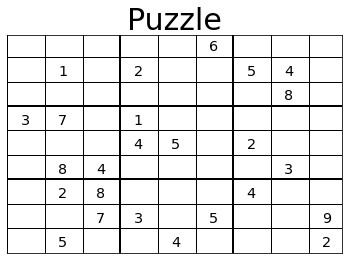

In [21]:
fig, ax = plt.subplots()
pos_x = np.linspace(0,0.9,9)
pos_y = np.linspace(0,0.9,9)

for i in range(9):
    for j in range(9):
        if best_sudo[j,i] != 0:
            plt.text(pos_x[i]+0.04,1-(pos_y[j])-0.07,str(best_sudo[j,i]),color='black',size='x-large')
        if i == 3 or i == 6:
            ax.axvline(pos_x[i],color='black',linewidth=1.5)
        if j == 3 or j == 6:
            ax.axhline(pos_y[j],color='black',linewidth=1.5)
        else:
            ax.axvline(pos_x[i],color='black',linewidth=1)
            ax.axhline(pos_y[j],color='black',linewidth=1)
ax.tick_params(bottom=False,left=False,labelbottom=False,labelleft=False)
plt.title("Puzzle",size=30)
plt.savefig("Soduku_Puzzle_{}_nums.pdf".format(81-biggest_num))
plt.show()

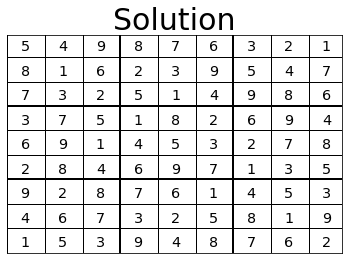

In [22]:
fig, ax = plt.subplots()
pos_x = np.linspace(0,0.9,9)
pos_y = np.linspace(0,0.9,9)

for i in range(9):
    for j in range(9):
        plt.text(pos_x[i]+0.04,1-(pos_y[j])-0.07,str(best_puzzle[j,i]),color='black',size='x-large')
        if i == 3 or i == 6:
            ax.axvline(pos_x[i],color='black',linewidth=1.5)
        if j == 3 or j == 6:
            ax.axhline(pos_y[j],color='black',linewidth=1.5)
        else:
            ax.axvline(pos_x[i],color='black',linewidth=1)
            ax.axhline(pos_y[j],color='black',linewidth=1)
ax.tick_params(bottom=False,left=False,labelbottom=False,labelleft=False)
plt.title("Solution",size=30)
plt.savefig("Soduku_Solution_{}_nums.pdf".format(81-biggest_num))
plt.show()

In [13]:
def new_remover(grid):
    """Removes all but 20 numbers and tests if only one solution exists before adding one"""
    coords = []
    # Generate sudoku positions
    for i in range(9):
        for j in range(9):
            coords.append((i,j))
    #Remove 60 numbers
    removed_coords = []
    removed_nums = []
    for i in range(50):
        index = np.random.choice(len(coords),replace=False)
        removed_coords.append(coords[index])
        removed_nums.append(grid[coords[index]])
        grid[coords[index]] = 0
    #test if only one solution and add number if so
    solve = False
    while not solve:
        solve = solver(grid)
        if solve == True:
            return grid
        else:
            n_ind = np.random.choice(len(removed_coords),replace=False)
            grid[removed_coords[n_ind]] = removed_nums[n_ind]
    